<a href="https://www.kaggle.com/code/shaunakmajumdar/competition-1?scriptVersionId=187549744" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction-spark4ai/sample_submission.csv
/kaggle/input/bank-customer-churn-prediction-spark4ai/train.csv
/kaggle/input/bank-customer-churn-prediction-spark4ai/test.csv


In [3]:

data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction-spark4ai/train.csv')
test = pd.read_csv('/kaggle/input/bank-customer-churn-prediction-spark4ai/test.csv')
test_copy = test.copy()
print(data.head())
# help(pd.DataFrame.head)

   id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15635502.0   Pirozzi        632.0    France  Female  63.0     5.0   
1   1  15595440.0   Horsley        730.0   Germany  Female  35.0     5.0   
2   2  15803566.0      Zito        598.0     Spain    Male  45.0     2.0   
3   3  15693906.0  Iloerika        678.0    France  Female  38.0     9.0   
4   4  15679531.0     K'ung        710.0    France  Female  32.0     4.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00            2.0        0.0             1.0        140780.80   
1  182532.23            2.0        1.0             1.0        136491.32   
2   94049.92            1.0        1.0             1.0        131718.12   
3       0.00            2.0        1.0             1.0        164768.82   
4       0.00            2.0        0.0             0.0        100187.43   

   Exited  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [4]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15635502.0,Pirozzi,632.0,France,Female,63.0,5.0,0.00,2.0,0.0,1.0,140780.80,0.0
1,1,15595440.0,Horsley,730.0,Germany,Female,35.0,5.0,182532.23,2.0,1.0,1.0,136491.32,0.0
2,2,15803566.0,Zito,598.0,Spain,Male,45.0,2.0,94049.92,1.0,1.0,1.0,131718.12,0.0
3,3,15693906.0,Iloerika,678.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,164768.82,0.0
4,4,15679531.0,K'ung,710.0,France,Female,32.0,4.0,0.00,2.0,0.0,0.0,100187.43,0.0


In [5]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15737792.0,Chiazagomekpere,727.0,France,Female,32.0,6.0,0.0,2.0,1.0,1.0,180969.55
1,15001,15808846.0,Ts'ai,690.0,France,Male,38.0,4.0,0.0,1.0,1.0,0.0,56780.97
2,15002,15652693.0,Manna,535.0,France,Female,31.0,7.0,118235.7,1.0,0.0,1.0,28407.40
3,15003,15602572.0,Chukwukadibia,638.0,Spain,Male,51.0,8.0,0.0,1.0,0.0,0.0,118570.53
4,15004,15684269.0,T'ien,584.0,Spain,Male,29.0,9.0,0.0,2.0,1.0,0.0,35795.85


In [6]:
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (tot

In [7]:
# help(pd.DataFrame)
data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#**FEATURE ENGINEERING**

In [9]:
from prettytable import PrettyTable
def uniqueval(df):

 table = PrettyTable()
 table.field_names = ["Features","Unique Values"]
 for i in list(df.columns) :
    nunique =df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
 print('Unique values in original dataset : \n')
 print(table)
uniqueval(data)

Unique values in original dataset : 

+-----------------+---------------+
|     Features    | Unique Values |
+-----------------+---------------+
|        id       |     15000     |
|    CustomerId   |      6293     |
|     Surname     |      764      |
|   CreditScore   |      379      |
|    Geography    |       3       |
|      Gender     |       2       |
|       Age       |       54      |
|      Tenure     |       12      |
|     Balance     |      3354     |
|  NumOfProducts  |       4       |
|    HasCrCard    |       2       |
|  IsActiveMember |       2       |
| EstimatedSalary |      6135     |
|      Exited     |       2       |
+-----------------+---------------+


**Breaking down age into various categories **

In [10]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["columns","null values"]
for i in list(data.columns) :
    nan_values =data[i].isnull().sum()
    table.add_row([i, f"{nan_values}"])
print("features with nan values")
print(table)

features with nan values
+-----------------+-------------+
|     columns     | null values |
+-----------------+-------------+
|        id       |      0      |
|    CustomerId   |      0      |
|     Surname     |      0      |
|   CreditScore   |      0      |
|    Geography    |      0      |
|      Gender     |      0      |
|       Age       |      0      |
|      Tenure     |      0      |
|     Balance     |      0      |
|  NumOfProducts  |      0      |
|    HasCrCard    |      0      |
|  IsActiveMember |      0      |
| EstimatedSalary |      0      |
|      Exited     |      0      |
+-----------------+-------------+


In [12]:
def nanvalue(df):
 from prettytable import PrettyTable
 table = PrettyTable()
 table.field_names = ["columns","null values"]
 for i in list(df.columns) :
    nan_values =df[i].isnull().sum()
    table.add_row([i, f"{nan_values}"])
 print("features with nan values")
 print(table)
nanvalue(test)

features with nan values
+-----------------+-------------+
|     columns     | null values |
+-----------------+-------------+
|        id       |      0      |
|    CustomerId   |      0      |
|     Surname     |      0      |
|   CreditScore   |      0      |
|    Geography    |      0      |
|      Gender     |      0      |
|       Age       |      0      |
|      Tenure     |      0      |
|     Balance     |      0      |
|  NumOfProducts  |      0      |
|    HasCrCard    |      0      |
|  IsActiveMember |      0      |
| EstimatedSalary |      0      |
+-----------------+-------------+


In [13]:
unique_values = data['Exited'].unique()
print("Unique values in 'Exited' column:", unique_values)

Unique values in 'Exited' column: [0. 1.]


In [14]:
nanvalue(data)

features with nan values
+-----------------+-------------+
|     columns     | null values |
+-----------------+-------------+
|        id       |      0      |
|    CustomerId   |      0      |
|     Surname     |      0      |
|   CreditScore   |      0      |
|    Geography    |      0      |
|      Gender     |      0      |
|       Age       |      0      |
|      Tenure     |      0      |
|     Balance     |      0      |
|  NumOfProducts  |      0      |
|    HasCrCard    |      0      |
|  IsActiveMember |      0      |
| EstimatedSalary |      0      |
|      Exited     |      0      |
+-----------------+-------------+


In [15]:
def age_cat(df):
  df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
  return df
data = age_cat(data)
test = age_cat(test)
data


   
 

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,0,15635502.0,Pirozzi,632.0,France,Female,63.0,5.0,0.00,2.0,0.0,1.0,140780.80,0.0,60+
1,1,15595440.0,Horsley,730.0,Germany,Female,35.0,5.0,182532.23,2.0,1.0,1.0,136491.32,0.0,30-40
2,2,15803566.0,Zito,598.0,Spain,Male,45.0,2.0,94049.92,1.0,1.0,1.0,131718.12,0.0,40-50
3,3,15693906.0,Iloerika,678.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,164768.82,0.0,30-40
4,4,15679531.0,K'ung,710.0,France,Female,32.0,4.0,0.00,2.0,0.0,0.0,100187.43,0.0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15681924.0,Hsiao,602.0,France,Female,31.0,2.0,0.00,2.0,1.0,0.0,122433.09,0.0,30-40
14996,14996,15615012.0,Onyekachukwu,731.0,France,Female,44.0,4.0,0.00,2.0,1.0,0.0,112973.22,0.0,40-50
14997,14997,15593694.0,Kosisochukwu,705.0,France,Female,39.0,2.0,129118.50,1.0,1.0,1.0,87985.20,0.0,30-40
14998,14998,15783541.0,Shih,648.0,Germany,Female,45.0,1.0,107868.14,1.0,1.0,0.0,141148.21,1.0,40-50


In [25]:
def cred_score(df):
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 300, 600, 700, 800, 900], labels=['0-300', '300-600', '600-700', '700-800', '900+'])
    return df
data = cred_score(data)
test = cred_score(test)

In [26]:
def acc_tr(df):
  df['Balance/salary']  = df['Balance']/df['EstimatedSalary']
  return df 
data = acc_tr(data)
test = acc_tr(test)

In [27]:
def geo_gender_tr(df) : 
    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']
    return df

data = geo_gender_tr(data)
test = geo_gender_tr(test)
print(data)


          id  CustomerId       Surname  CreditScore Geography  Gender   Age  \
0          0  15635502.0       Pirozzi        632.0    France  Female  63.0   
1          1  15595440.0       Horsley        730.0   Germany  Female  35.0   
2          2  15803566.0          Zito        598.0     Spain    Male  45.0   
3          3  15693906.0      Iloerika        678.0    France  Female  38.0   
4          4  15679531.0         K'ung        710.0    France  Female  32.0   
...      ...         ...           ...          ...       ...     ...   ...   
14995  14995  15681924.0         Hsiao        602.0    France  Female  31.0   
14996  14996  15615012.0  Onyekachukwu        731.0    France  Female  44.0   
14997  14997  15593694.0  Kosisochukwu        705.0    France  Female  39.0   
14998  14998  15783541.0          Shih        648.0   Germany  Female  45.0   
14999  14999  15713608.0      Yefimova        721.0    France    Male  39.0   

       Tenure    Balance  NumOfProducts  HasCrCard 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  15000 non-null  int64   
 1   CustomerId          15000 non-null  float64 
 2   Surname             15000 non-null  object  
 3   CreditScore         15000 non-null  float64 
 4   Geography           15000 non-null  object  
 5   Gender              15000 non-null  object  
 6   Age                 15000 non-null  float64 
 7   Tenure              15000 non-null  float64 
 8   Balance             15000 non-null  float64 
 9   NumOfProducts       15000 non-null  float64 
 10  HasCrCard           15000 non-null  float64 
 11  IsActiveMember      15000 non-null  float64 
 12  EstimatedSalary     15000 non-null  float64 
 13  Exited              15000 non-null  float64 
 14  Age_Category        14993 non-null  category
 15  Credit_Score_Range  15000 non-null  

In [29]:
nanvalue(data)

features with nan values
+--------------------+-------------+
|      columns       | null values |
+--------------------+-------------+
|         id         |      0      |
|     CustomerId     |      0      |
|      Surname       |      0      |
|    CreditScore     |      0      |
|     Geography      |      0      |
|       Gender       |      0      |
|        Age         |      0      |
|       Tenure       |      0      |
|      Balance       |      0      |
|   NumOfProducts    |      0      |
|     HasCrCard      |      0      |
|   IsActiveMember   |      0      |
|  EstimatedSalary   |      0      |
|       Exited       |      0      |
|    Age_Category    |      7      |
| Credit_Score_Range |      0      |
|   Balance/salary   |      0      |
|     Geo_Gender     |      0      |
+--------------------+-------------+


# ****DATA PREPROCESSING****

In [30]:
data.dropna(subset=['Age_Category'], inplace=True)
mode_value = test['Age_Category'].mode()[0]

# Replacing NaN values with modetest['Age_Category'].fillna(mode_value, inplace=True)
test['Age_Category'] = test['Age_Category'].fillna(mode_value)
# test.dropna(subset=['Age_Category'], inplace=True)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  10000 non-null  int64   
 1   CustomerId          10000 non-null  float64 
 2   Surname             10000 non-null  object  
 3   CreditScore         10000 non-null  float64 
 4   Geography           10000 non-null  object  
 5   Gender              10000 non-null  object  
 6   Age                 10000 non-null  float64 
 7   Tenure              10000 non-null  float64 
 8   Balance             10000 non-null  float64 
 9   NumOfProducts       10000 non-null  float64 
 10  HasCrCard           10000 non-null  float64 
 11  IsActiveMember      10000 non-null  float64 
 12  EstimatedSalary     10000 non-null  float64 
 13  Age_Category        10000 non-null  category
 14  Credit_Score_Range  10000 non-null  category
 15  Balance/salary      10000 non-null  f

In [32]:
nanvalue(data)

features with nan values
+--------------------+-------------+
|      columns       | null values |
+--------------------+-------------+
|         id         |      0      |
|     CustomerId     |      0      |
|      Surname       |      0      |
|    CreditScore     |      0      |
|     Geography      |      0      |
|       Gender       |      0      |
|        Age         |      0      |
|       Tenure       |      0      |
|      Balance       |      0      |
|   NumOfProducts    |      0      |
|     HasCrCard      |      0      |
|   IsActiveMember   |      0      |
|  EstimatedSalary   |      0      |
|       Exited       |      0      |
|    Age_Category    |      0      |
| Credit_Score_Range |      0      |
|   Balance/salary   |      0      |
|     Geo_Gender     |      0      |
+--------------------+-------------+


In [33]:
nanvalue(test)

features with nan values
+--------------------+-------------+
|      columns       | null values |
+--------------------+-------------+
|         id         |      0      |
|     CustomerId     |      0      |
|      Surname       |      0      |
|    CreditScore     |      0      |
|     Geography      |      0      |
|       Gender       |      0      |
|        Age         |      0      |
|       Tenure       |      0      |
|      Balance       |      0      |
|   NumOfProducts    |      0      |
|     HasCrCard      |      0      |
|   IsActiveMember   |      0      |
|  EstimatedSalary   |      0      |
|    Age_Category    |      0      |
| Credit_Score_Range |      0      |
|   Balance/salary   |      0      |
|     Geo_Gender     |      0      |
+--------------------+-------------+


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  14993 non-null  int64   
 1   CustomerId          14993 non-null  float64 
 2   Surname             14993 non-null  object  
 3   CreditScore         14993 non-null  float64 
 4   Geography           14993 non-null  object  
 5   Gender              14993 non-null  object  
 6   Age                 14993 non-null  float64 
 7   Tenure              14993 non-null  float64 
 8   Balance             14993 non-null  float64 
 9   NumOfProducts       14993 non-null  float64 
 10  HasCrCard           14993 non-null  float64 
 11  IsActiveMember      14993 non-null  float64 
 12  EstimatedSalary     14993 non-null  float64 
 13  Exited              14993 non-null  float64 
 14  Age_Category        14993 non-null  category
 15  Credit_Score_Range  14993 non-null  categ

In [35]:
numeric_cols= ['CreditScore', 'Age',  'Balance', 'EstimatedSalary','Balance/salary','Tenure', ]
# for col in numeric_cols:
#     data[col] = pd.to_numeric(data[col], errors='coerce')
#     test[col] = pd.to_numeric(data[col], errors='coerce')

# # Step 2: Handle NaN values
# # Option A: Drop rows with NaN values
# data = data.dropna(subset=numeric_cols)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train =  sc.fit_transform(data[numeric_cols])
scaled_test =   sc.fit_transform(test[numeric_cols])
scaled_train = pd.DataFrame(scaled_train, columns=numeric_cols) 
scaled_test = pd.DataFrame(scaled_test, columns=numeric_cols) 

In [37]:


columns_to_drop1 = [ 'CustomerId',  'id','Surname','Exited' ]
columns_to_drop2 = [ 'CustomerId', 'Surname' ,'id']
train_X = data.drop(columns_to_drop1, axis = 1)  
test_X=  test.drop(columns_to_drop2, axis = 1)



# val_y = test['Exited']



In [38]:
# Drop numeric columns from categorical data
train_ohe = train_X.drop(numeric_cols, axis=1)
test_ohe = test_X.drop(numeric_cols, axis=1)

# Perform one-hot encoding
ohe_train = pd.get_dummies(train_ohe, columns=train_ohe.columns)
ohe_test = pd.get_dummies(test_ohe, columns=test_ohe.columns)

# Replace boolean values with 1s and 0s
ohe_train = ohe_train.astype(int)  # Ensure all columns are integer type
ohe_test = ohe_test.astype(int)    # Ensure all columns are integer type

In [39]:
train_df = pd.concat([ohe_train, scaled_train,data['Exited']], axis =1)
test_df = pd.concat([ohe_test, scaled_test ], axis =1)
# set_frame_style(train_df_1.head())
train_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,HasCrCard_0.0,...,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,CreditScore,Age,Balance,EstimatedSalary,Balance/salary,Tenure,Exited
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.363958,3.069192,-0.315206,0.335131,-0.019405,-0.018074,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.966060,-0.349632,0.994555,0.271793,-0.007300,-0.018074,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.825393,0.871377,0.359649,0.201312,-0.012942,-1.094820,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.260336,0.016670,-0.315206,0.689337,-0.019405,1.417588,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.694628,-0.715935,-0.315206,-0.264269,-0.019405,-0.376989,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.721771,-0.471733,-0.315206,0.185378,-0.019405,0.340842,NaN
6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.748914,0.260872,-0.315206,-0.970888,-0.019405,-1.812651,NaN
7159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.146812,-1.326439,-0.315206,-1.596211,-0.019405,0.699757,NaN
9511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.852536,-0.960137,0.773733,-0.150735,-0.006671,1.058672,NaN


In [40]:
test_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,HasCrCard_0.0,...,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,CreditScore,Age,Balance,EstimatedSalary,Balance/salary,Tenure
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0.930123,-0.714749,-0.697743,1.388859,-0.016908,0.318234
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0.428373,0.010247,-0.697743,-1.338643,-0.016908,-0.394735
2,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,-1.673555,-0.835581,1.292186,-1.961800,0.021930,0.674718
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,-0.276790,1.581069,-0.697743,0.018415,-0.016908,1.031203
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,-1.009075,-1.077246,-0.697743,-1.799531,-0.016908,1.387687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,-0.086938,1.460237,-0.697743,0.068562,-0.016908,1.031203
9996,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0.374130,0.493577,-0.697743,1.169475,-0.016908,0.674718
9997,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,-0.954831,0.251912,1.079579,-1.007407,-0.003196,-1.107704
9998,0,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0.360569,0.493577,1.620016,-0.765706,-0.001401,-1.107704


In [41]:
 nanvalue(train_df)


features with nan values
+----------------------------+-------------+
|          columns           | null values |
+----------------------------+-------------+
|      Geography_France      |      7      |
|     Geography_Germany      |      7      |
|      Geography_Spain       |      7      |
|       Gender_Female        |      7      |
|        Gender_Male         |      7      |
|     NumOfProducts_1.0      |      7      |
|     NumOfProducts_2.0      |      7      |
|     NumOfProducts_3.0      |      7      |
|     NumOfProducts_4.0      |      7      |
|       HasCrCard_0.0        |      7      |
|       HasCrCard_1.0        |      7      |
|     IsActiveMember_0.0     |      7      |
|     IsActiveMember_1.0     |      7      |
|     Age_Category_18-30     |      7      |
|     Age_Category_30-40     |      7      |
|     Age_Category_40-50     |      7      |
|     Age_Category_50-60     |      7      |
|      Age_Category_60+      |      7      |
|  Credit_Score_Range_0-300  |

In [42]:
nanvalue(test_df)

features with nan values
+----------------------------+-------------+
|          columns           | null values |
+----------------------------+-------------+
|      Geography_France      |      0      |
|     Geography_Germany      |      0      |
|      Geography_Spain       |      0      |
|       Gender_Female        |      0      |
|        Gender_Male         |      0      |
|     NumOfProducts_1.0      |      0      |
|     NumOfProducts_2.0      |      0      |
|     NumOfProducts_3.0      |      0      |
|     NumOfProducts_4.0      |      0      |
|       HasCrCard_0.0        |      0      |
|       HasCrCard_1.0        |      0      |
|     IsActiveMember_0.0     |      0      |
|     IsActiveMember_1.0     |      0      |
|     Age_Category_18-30     |      0      |
|     Age_Category_30-40     |      0      |
|     Age_Category_40-50     |      0      |
|     Age_Category_50-60     |      0      |
|      Age_Category_60+      |      0      |
|  Credit_Score_Range_0-300  |

In [71]:
train_df = train_df.dropna()
# test_df = test_df.dropna()


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14986 entries, 0 to 14992
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Geography_France            14986 non-null  float64
 1   Geography_Germany           14986 non-null  float64
 2   Geography_Spain             14986 non-null  float64
 3   Gender_Female               14986 non-null  float64
 4   Gender_Male                 14986 non-null  float64
 5   NumOfProducts_1.0           14986 non-null  float64
 6   NumOfProducts_2.0           14986 non-null  float64
 7   NumOfProducts_3.0           14986 non-null  float64
 8   NumOfProducts_4.0           14986 non-null  float64
 9   HasCrCard_0.0               14986 non-null  float64
 10  HasCrCard_1.0               14986 non-null  float64
 11  IsActiveMember_0.0          14986 non-null  float64
 12  IsActiveMember_1.0          14986 non-null  float64
 13  Age_Category_18-30          14986 no

In [ ]:
# ohe_train = ohe_train.drop(['Gender_Male'],axis =1)
# ohe_test = ohe_test.drop(['Gender_Male'],axis =1)

In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Geography_France            10000 non-null  int64  
 1   Geography_Germany           10000 non-null  int64  
 2   Geography_Spain             10000 non-null  int64  
 3   Gender_Female               10000 non-null  int64  
 4   Gender_Male                 10000 non-null  int64  
 5   NumOfProducts_1.0           10000 non-null  int64  
 6   NumOfProducts_2.0           10000 non-null  int64  
 7   NumOfProducts_3.0           10000 non-null  int64  
 8   NumOfProducts_4.0           10000 non-null  int64  
 9   HasCrCard_0.0               10000 non-null  int64  
 10  HasCrCard_1.0               10000 non-null  int64  
 11  IsActiveMember_0.0          10000 non-null  int64  
 12  IsActiveMember_1.0          10000 non-null  int64  
 13  Age_Category_18-30          1000

In [47]:
 train_df.columns


Index(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'NumOfProducts_1.0',
       'NumOfProducts_2.0', 'NumOfProducts_3.0', 'NumOfProducts_4.0',
       'HasCrCard_0.0', 'HasCrCard_1.0', 'IsActiveMember_0.0',
       'IsActiveMember_1.0', 'Age_Category_18-30', 'Age_Category_30-40',
       'Age_Category_40-50', 'Age_Category_50-60', 'Age_Category_60+',
       'Credit_Score_Range_0-300', 'Credit_Score_Range_300-600',
       'Credit_Score_Range_600-700', 'Credit_Score_Range_700-800',
       'Credit_Score_Range_900+', 'Geo_Gender_France_Female',
       'Geo_Gender_France_Male', 'Geo_Gender_Germany_Female',
       'Geo_Gender_Germany_Male', 'Geo_Gender_Spain_Female',
       'Geo_Gender_Spain_Male', 'CreditScore', 'Age', 'Balance',
       'EstimatedSalary', 'Balance/salary', 'Tenure', 'Exited'],
      dtype='object')

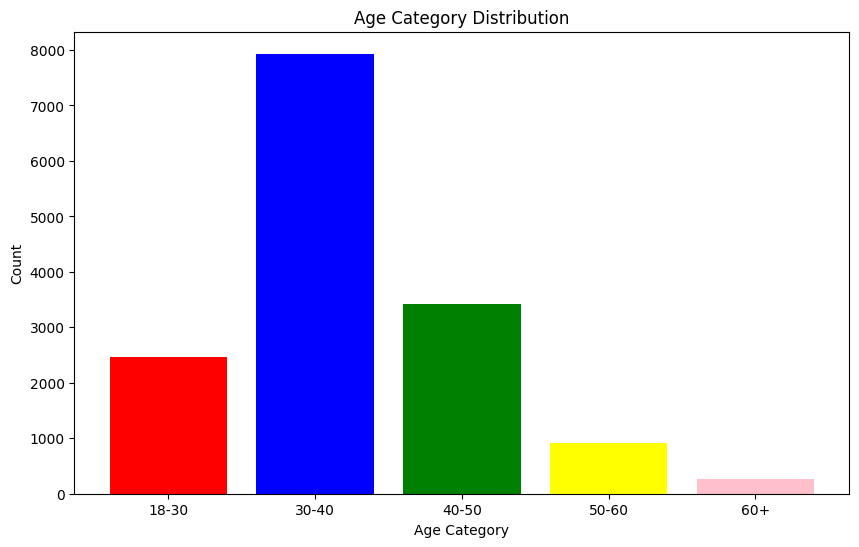

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


counts = {
    '18-30': train_df['Age_Category_18-30'].sum(),
    '30-40': train_df['Age_Category_30-40'].sum(),
    '40-50': train_df['Age_Category_40-50'].sum(),
    '50-60': train_df['Age_Category_50-60'].sum(),
    '60+': train_df['Age_Category_60+'].sum()
}


categories = list(counts.keys())
values = list(counts.values())
colors = ('red','blue','green','yellow','pink') 
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color= colors )
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.show()

<!-- plt.figure(figsize=(10, 6))
plt.bar(train_df['Age_Category'],  color='skyblue')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.show() -->

In [ ]:
# import pandas as pd

# # Concatenate train and test data to ensure consistent one-hot encoding across both datasets
# concatenated_df = pd.concat([train_X, val_X])

# # One hot encode categorical columns
# concatenated_df_encoded = pd.get_dummies(concatenated_df)

# # Separate back into train and test data
# train_X_en = concatenated_df_encoded.iloc[:len(train_X)]
# val_X_en = concatenated_df_encoded.iloc[len(train_X):]
# train_X_en.reset_index(drop=True, inplace=True)
# val_X_en.reset_index(drop=True, inplace=True)


# print("Train Data One-Hot Encoded:")
# print(train_X_en)
# print("\nTest Data One-Hot Encoded:")
# print(val_X_en)

In [55]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import  confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
x = train_df
y = train_df['Exited']

x.drop(columns=['Exited'], inplace=True)


In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14986 entries, 0 to 14992
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Geography_France            14986 non-null  float64
 1   Geography_Germany           14986 non-null  float64
 2   Geography_Spain             14986 non-null  float64
 3   Gender_Female               14986 non-null  float64
 4   Gender_Male                 14986 non-null  float64
 5   NumOfProducts_1.0           14986 non-null  float64
 6   NumOfProducts_2.0           14986 non-null  float64
 7   NumOfProducts_3.0           14986 non-null  float64
 8   NumOfProducts_4.0           14986 non-null  float64
 9   HasCrCard_0.0               14986 non-null  float64
 10  HasCrCard_1.0               14986 non-null  float64
 11  IsActiveMember_0.0          14986 non-null  float64
 12  IsActiveMember_1.0          14986 non-null  float64
 13  Age_Category_18-30          14986 no

In [59]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model1 = xgb.XGBClassifier(objective='binary:logistic', max_depth=6, learning_rate=0.1, n_estimators=100, random_state=0)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(train_X_en, train_y_en, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_X_scaled = scaler.fit_transform(train_X_en)
# val_X_scaled = scaler.transform(val_X_en)



In [79]:
  from sklearn.ensemble import RandomForestClassifier
  model11 = RandomForestClassifier(random_state = 1,n_estimators=100)
  model11.fit(x_train,y_train)
  pred11y = model11.predict(x_test)

In [80]:
import sklearn.metrics as metrics
print("prediction values are",pred11y)
accuracy = metrics.accuracy_score(y_test, pred11y)
print("Accuracy is: ", accuracy)
  

prediction values are [0. 0. 0. ... 0. 0. 0.]
Accuracy is:  0.875250166777852


In [60]:
 import sklearn.metrics as metrics
# pred_y = model.predict(val_X_scaled)
 print("prediction values are",y_pred)
 accuracy = metrics.accuracy_score(y_test, y_pred)
 print("Accuracy is: ", accuracy)


prediction values are [0 0 0 ... 0 0 0]
Accuracy is:  0.8865910607071381


In [63]:
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(verbose = False)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy is: ", accuracy)

Accuracy is:  0.8855903935957304


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics


model3 = Sequential([
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=10, activation='linear')
])


model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])  



# Train the model
model3.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)  

# Evaluate the model on test data
loss, accuracy = model3.evaluate(x_test, y_test)

print(f'Accuracy after final epoch: {accuracy * 100:.2f}%')

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7926 - loss: 3.5400
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 3.2786
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7902 - loss: 3.3815
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7914 - loss: 3.3629
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 3.3218
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 3.2792
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 3.2503
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 3.2586
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7909 - loss: 3.3705
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7989 - loss: 3.2412
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7929 - loss: 3.3380
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [68]:

 pred_y = model2.predict(test_df)

In [69]:


# # Extracting 'Id' column
submission_df = test_copy[['id']].copy()

# # Making predictions for 'Exited' column
submission_df['Exited'] = pred_y

# # Saving DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)